In [1]:
import os
import re
import sys
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def find_exp_directory(base_path, exp_prefix="exp_name"):
    # Look for a directory that starts with the specified prefix
    for root, dirs, files in os.walk(base_path):
        for dir_name in dirs:
            if dir_name.startswith(exp_prefix):
                # Return the full path to the exp directory
                return os.path.join(root, dir_name)
    return None

def load_pickle_from_directories_once(exp_directory):
    loaded_pickles = []
    # Dictionary to map each numeric prefix to its full directory path
    dir_map = {}

    # Scan the directory structure once
    for root, dirs, files in os.walk(exp_directory):
        for dir_name in dirs:
            # Split the directory name on '_' and check if the first part is numeric
            parts = dir_name.split('_', 1)
            if parts[0].isdigit():
                # Map the numeric prefix to the full path of the cumulative_timesteps.pkl file
                dir_map[int(parts[0])] = os.path.join(root, dir_name, 'cumulative_timesteps.pkl')

    # Process directories in numeric order
    for num in sorted(dir_map.keys()):
        pickle_path = dir_map[num]
        if os.path.exists(pickle_path):
            try:
                with open(pickle_path, 'rb') as pickle_file:
                    loaded_pickles.append(pickle.load(pickle_file))
                    print(f"Loaded pickle from: {pickle_path}")
            except Exception as e:
                print(f"Failed to load pickle from: {pickle_path}. Error: {e}")
        else:
            print(f"Pickle file not found in: {pickle_path}")

    return loaded_pickles

In [3]:
# Replace 'your_base_path' with the path to the parent directory containing your 'exp_name' directory
exp_directory = find_exp_directory('Scarab-Trace-and-Simulate-Script/results/', 'acc_exp_3_chip_cycle_time')
loaded_pickles = load_pickle_from_directories_once(exp_directory)

Loaded pickle from: Scarab-Trace-and-Simulate-Script/results/acc_exp_3_chip_cycle_time_sweep_time_horizon5_control_sampling_time0.5_num_proc56/0_2024-04-11_22-39-03/cumulative_timesteps.pkl
Loaded pickle from: Scarab-Trace-and-Simulate-Script/results/acc_exp_3_chip_cycle_time_sweep_time_horizon5_control_sampling_time0.5_num_proc56/1_2024-04-11_22-39-03/cumulative_timesteps.pkl
Loaded pickle from: Scarab-Trace-and-Simulate-Script/results/acc_exp_3_chip_cycle_time_sweep_time_horizon5_control_sampling_time0.5_num_proc56/2_2024-04-11_22-39-03/cumulative_timesteps.pkl
Loaded pickle from: Scarab-Trace-and-Simulate-Script/results/acc_exp_3_chip_cycle_time_sweep_time_horizon5_control_sampling_time0.5_num_proc56/3_2024-04-11_22-39-03/cumulative_timesteps.pkl
Loaded pickle from: Scarab-Trace-and-Simulate-Script/results/acc_exp_3_chip_cycle_time_sweep_time_horizon5_control_sampling_time0.5_num_proc56/4_2024-04-11_22-39-03/cumulative_timesteps.pkl
Loaded pickle from: Scarab-Trace-and-Simulate-Scri

In [8]:
def plot_general_box_plots(data, parameter_sweep_values, xlabel):
    """
    Plot box plots for an arbitrary number of data sets.
    
    :param data: A list of lists, where each inner list represents a data set containing dictionaries
                 with observations at different timesteps.
    """
    xlabels = parameter_sweep_values[xlabel]
    # Prepare the data for plotting
    values_for_plotting = []
    for single_set in data:
        # Flatten all values from the dictionaries in each set into a single list
        all_values = [value for timestep in single_set for value in timestep.values()]
        values_for_plotting.append(all_values)
    
    # Plotting
    plt.figure(figsize=(12, 8))
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    
    plt.boxplot(values_for_plotting, patch_artist=True, notch=True, labels=xlabels)
    
    plt.title('Parameter Sweep', fontsize=16)  # Larger title font size
    plt.xlabel(xlabel, fontsize=14)  # Larger x-axis label font size
    plt.ylabel('Computation Time (s)', fontsize=14)  # Larger y-axis label font size
    plt.xticks(fontsize=12)  # Larger x-axis tick labels
    plt.yticks(fontsize=12)  # Larger y-axis tick labels
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

In [5]:
def plot_general_violin_plots(data, parameter_sweep_values, xlabel):
    """
    Plot violin plots for an arbitrary number of data sets.
    
    :param data: A list of lists, where each inner list represents a data set containing dictionaries
                 with observations at different timesteps.
    """
    xlabels = parameter_sweep_values[xlabel]
    # Prepare the data for plotting
    values_for_plotting = []
    for single_set in data:
        # Flatten all values from the dictionaries in each set into a single list
        all_values = [value for timestep in single_set for value in timestep.values()]
        values_for_plotting.append(all_values)
    
    # Plotting
    plt.figure(figsize=(12, 8))
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    
    plt.violinplot(values_for_plotting, showmeans=False, showmedians=True)
    plt.xticks(range(1, len(xlabels) + 1), xlabels)
    
    plt.title('Parameter Sweep')
    plt.xlabel(xlabel)
    plt.ylabel('Computation Time (s)')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

In [6]:
parameter_sweep_values = {'l1_size (l3 cache size)': [2**20, 2**17, 2**14, 2**11, 2**9], 
                          'Clock frequency (GHz)': [4.5, 1.5, 0.5]}

ValueError: Dimensions of labels and X must be compatible

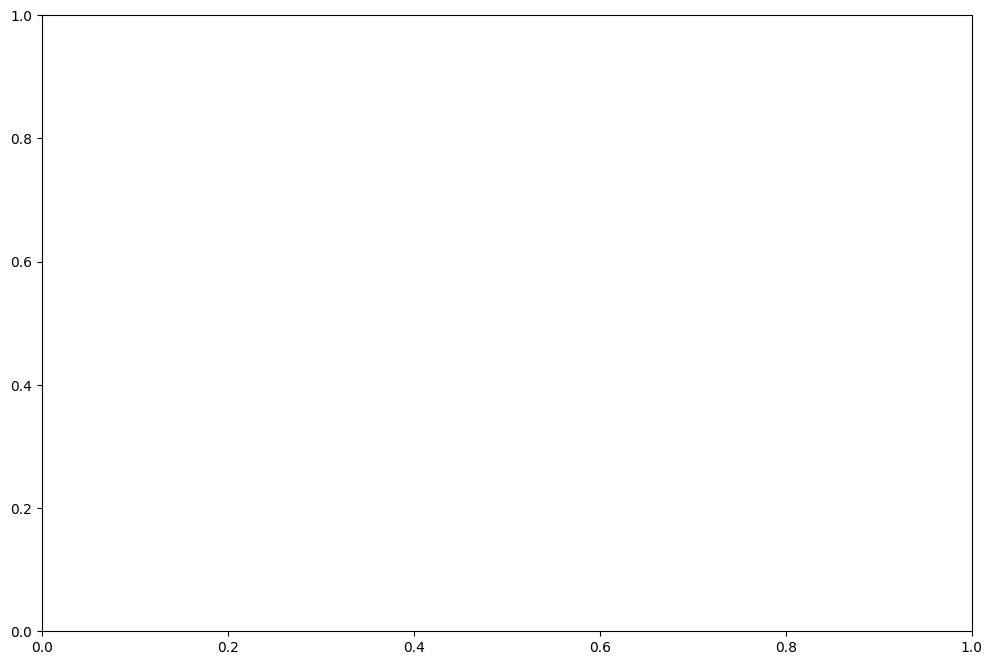

In [7]:
plot_general_box_plots(loaded_pickles, parameter_sweep_values, "l1_size (l3 cache size)")

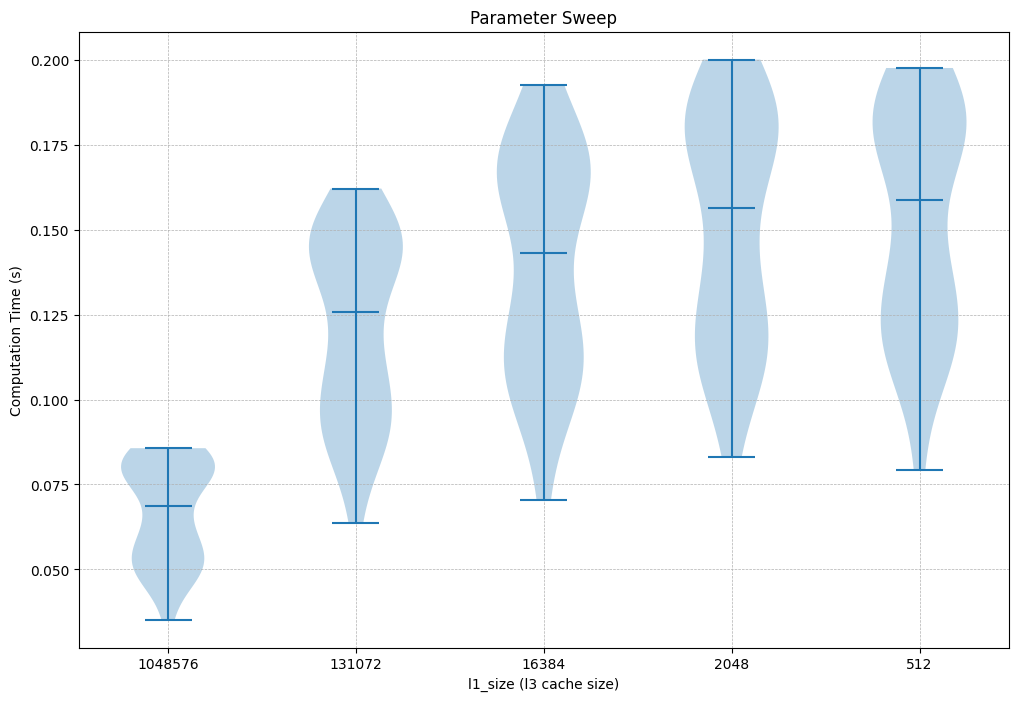

In [7]:
plot_general_violin_plots(loaded_pickles, parameter_sweep_values, "l1_size (l3 cache size)")

In [8]:
exp_directory = find_exp_directory('Scarab-Trace-and-Simulate-Script/results/', 'exp6_chip_cycle_time')
loaded_pickles2 = load_pickle_from_directories_once(exp_directory)

Loaded pickle from: Scarab-Trace-and-Simulate-Script/results/exp6_chip_cycle_time_time_horizon0.2_control_sampling_time0.1_num_proc32/0_2024-04-07_19-16-03/cumulative_timesteps.pkl
Loaded pickle from: Scarab-Trace-and-Simulate-Script/results/exp6_chip_cycle_time_time_horizon0.2_control_sampling_time0.1_num_proc32/1_2024-04-07_19-16-12/cumulative_timesteps.pkl
Loaded pickle from: Scarab-Trace-and-Simulate-Script/results/exp6_chip_cycle_time_time_horizon0.2_control_sampling_time0.1_num_proc32/2_2024-04-07_19-26-53/cumulative_timesteps.pkl


## ACC Example

In [9]:
# Replace 'your_base_path' with the path to the parent directory containing your 'exp_name' directory
exp_directory = find_exp_directory('Scarab-Trace-and-Simulate-Script/results/', 'acc_exp_3_chip_cycle_time')
loaded_pickles = load_pickle_from_directories_once(exp_directory)

Loaded pickle from: Scarab-Trace-and-Simulate-Script/results/acc_exp_3_chip_cycle_time_sweep_time_horizon5_control_sampling_time0.5_num_proc56/0_2024-04-11_22-39-03/cumulative_timesteps.pkl
Loaded pickle from: Scarab-Trace-and-Simulate-Script/results/acc_exp_3_chip_cycle_time_sweep_time_horizon5_control_sampling_time0.5_num_proc56/1_2024-04-11_22-39-03/cumulative_timesteps.pkl
Loaded pickle from: Scarab-Trace-and-Simulate-Script/results/acc_exp_3_chip_cycle_time_sweep_time_horizon5_control_sampling_time0.5_num_proc56/2_2024-04-11_22-39-03/cumulative_timesteps.pkl
Loaded pickle from: Scarab-Trace-and-Simulate-Script/results/acc_exp_3_chip_cycle_time_sweep_time_horizon5_control_sampling_time0.5_num_proc56/3_2024-04-11_22-39-03/cumulative_timesteps.pkl
Loaded pickle from: Scarab-Trace-and-Simulate-Script/results/acc_exp_3_chip_cycle_time_sweep_time_horizon5_control_sampling_time0.5_num_proc56/4_2024-04-11_22-39-03/cumulative_timesteps.pkl
Loaded pickle from: Scarab-Trace-and-Simulate-Scri

In [17]:
parameter_sweep_values_acc = {'L3 Cache Size 2^x': [7, 9, 11, 13, 15, 17, 19, 21, 23, 25], 
                           'Clock Frequency (GHz)': [0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.8, 3.2, 3.6, 4.0]}

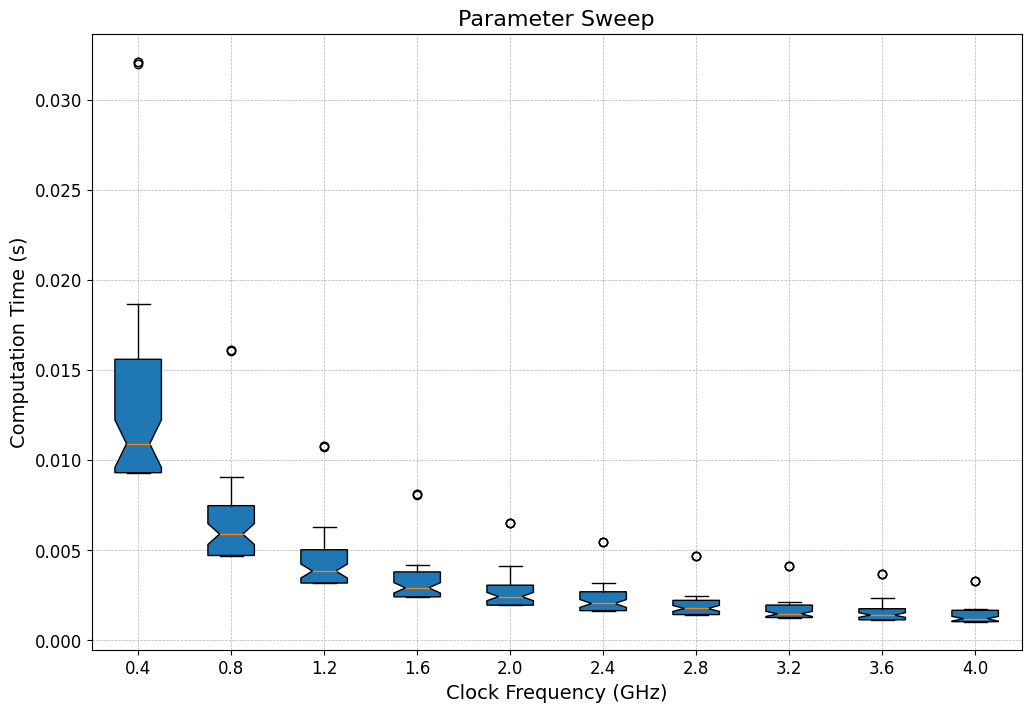

In [18]:
plot_general_box_plots(loaded_pickles, parameter_sweep_values_acc, "Clock Frequency (GHz)")

In [ ]:
plot_general_violin_plots(loaded_pickles, parameter_sweep_values2, "Clock frequency (GHz)")

In [13]:
# Replace 'your_base_path' with the path to the parent directory containing your 'exp_name' directory
exp_directory = find_exp_directory('Scarab-Trace-and-Simulate-Script/results/', 'acc_exp_3_l1_size')
loaded_pickles2 = load_pickle_from_directories_once(exp_directory)

Loaded pickle from: Scarab-Trace-and-Simulate-Script/results/acc_exp_3_l1_size_sweep_time_horizon5_control_sampling_time0.5_num_proc56/0_2024-04-11_22-40-33/cumulative_timesteps.pkl
Loaded pickle from: Scarab-Trace-and-Simulate-Script/results/acc_exp_3_l1_size_sweep_time_horizon5_control_sampling_time0.5_num_proc56/1_2024-04-11_22-40-33/cumulative_timesteps.pkl
Loaded pickle from: Scarab-Trace-and-Simulate-Script/results/acc_exp_3_l1_size_sweep_time_horizon5_control_sampling_time0.5_num_proc56/2_2024-04-11_22-40-33/cumulative_timesteps.pkl
Loaded pickle from: Scarab-Trace-and-Simulate-Script/results/acc_exp_3_l1_size_sweep_time_horizon5_control_sampling_time0.5_num_proc56/3_2024-04-11_22-40-33/cumulative_timesteps.pkl
Loaded pickle from: Scarab-Trace-and-Simulate-Script/results/acc_exp_3_l1_size_sweep_time_horizon5_control_sampling_time0.5_num_proc56/4_2024-04-11_22-40-33/cumulative_timesteps.pkl
Loaded pickle from: Scarab-Trace-and-Simulate-Script/results/acc_exp_3_l1_size_sweep_time_

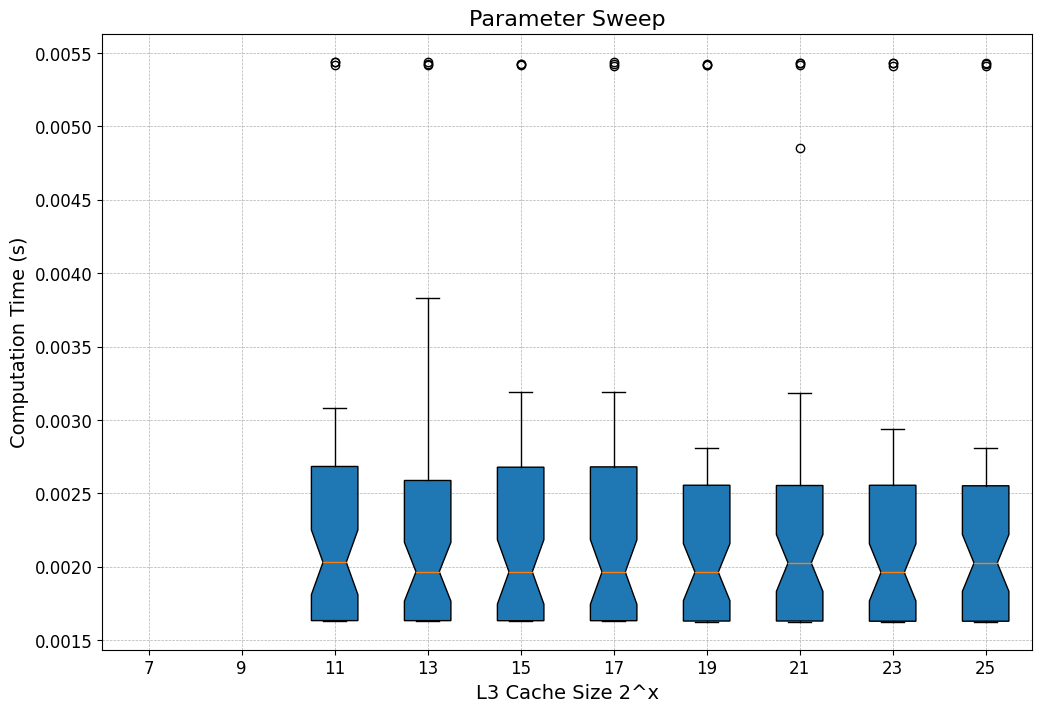

In [19]:
plot_general_box_plots(loaded_pickles2, parameter_sweep_values_acc, "L3 Cache Size 2^x")

In [14]:
plot_general_violin_plots(loaded_pickles2, parameter_sweep_values_acc, "l1_size (l3 cache size) 2^x")

NameError: name 'plot_general_violin_plots' is not defined

In [25]:
def plot_time_series(data, parameter_sweep_values, xlabel):
    """
    Plot time series for an arbitrary number of data sets.
    
    :param data: A list of lists, where each inner list represents a data set containing dictionaries
                 with observations at different timesteps.
    :param parameter_sweep_values: Dictionary containing labels for each data set.
    :param xlabel: String representing the key in parameter_sweep_values for x-axis labels.
    """
    plt.figure(figsize=(12, 8))

    # Prepare the data for plotting
    i=1
    for single_set, label in zip(data, parameter_sweep_values[xlabel]):
        if i%3:
            i += 1
            continue
        i += 1
        # Create a list of (x, y) pairs, then sort by x before plotting
        pairs = [(x, y) for timestep in single_set for x, y in timestep.items()]
        pairs_sorted = sorted(pairs, key=lambda pair: pair[0])  # Sort by x-value
        x_values, y_values = zip(*pairs_sorted)  # Unpack sorted pairs into separate lists

        plt.plot(x_values, y_values, label=label)

    plt.title(xlabel + ' Parameter Sweep', fontsize=16)
    plt.xlabel('Timestep', fontsize=14)
    plt.ylabel('Computation Time (s)', fontsize=14)
    plt.xticks(fontsize=12)  # Larger x-axis tick labels
    plt.yticks(fontsize=12)  # Larger y-axis tick labels
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

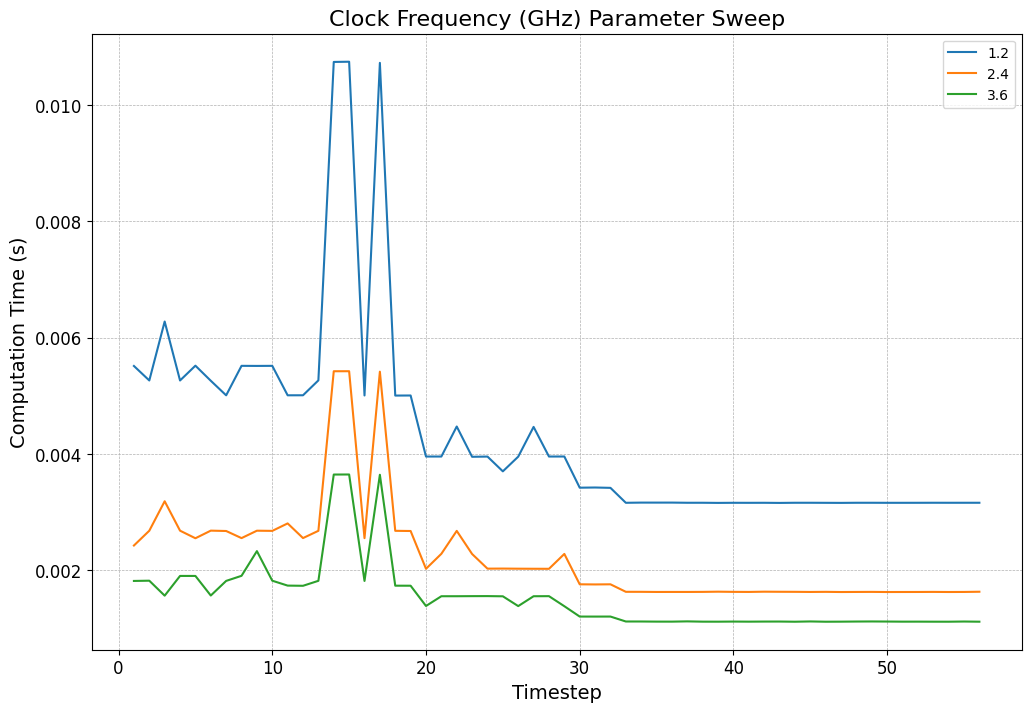

In [26]:
plot_time_series(loaded_pickles, parameter_sweep_values_acc, "Clock Frequency (GHz)")

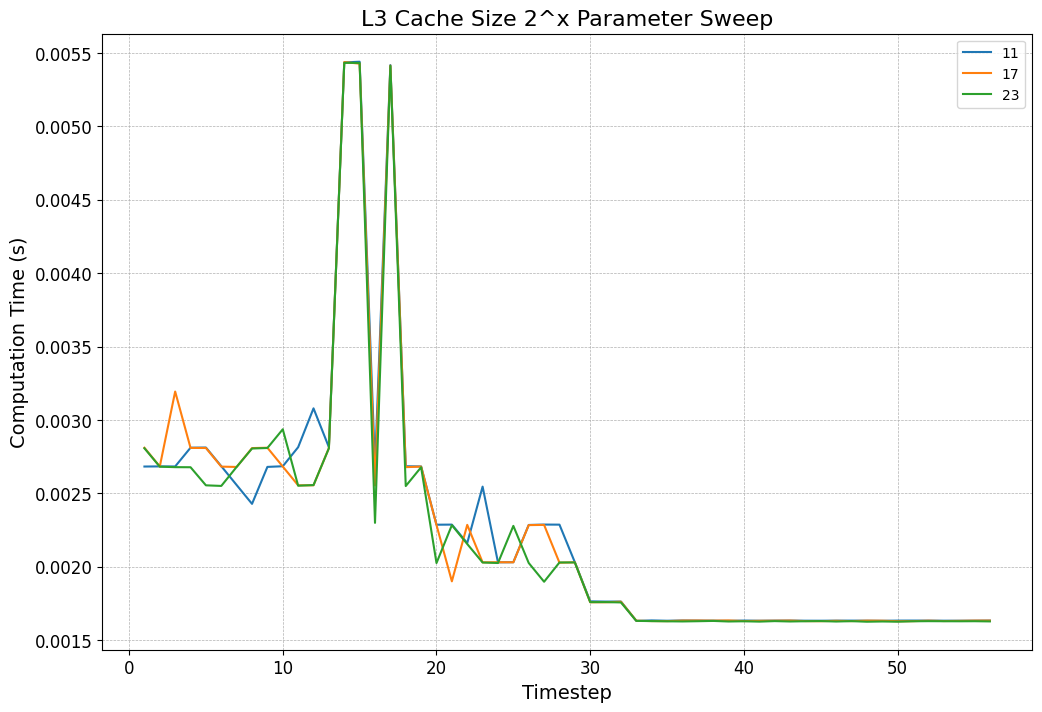

In [27]:
plot_time_series(loaded_pickles2, parameter_sweep_values_acc, "L3 Cache Size 2^x")

In [29]:
# Replace 'your_base_path' with the path to the parent directory containing your 'exp_name' directory
exp_directory = find_exp_directory('Scarab-Trace-and-Simulate-Script/results/', 'acc_exp_3_cortex_m55')
loaded_pickles3 = load_pickle_from_directories_once(exp_directory)

Loaded pickle from: Scarab-Trace-and-Simulate-Script/results/acc_exp_3_cortex_m55_time_horizon2_control_sampling_time0.5_num_proc56/0_2024-04-15_22-39-23/cumulative_timesteps.pkl


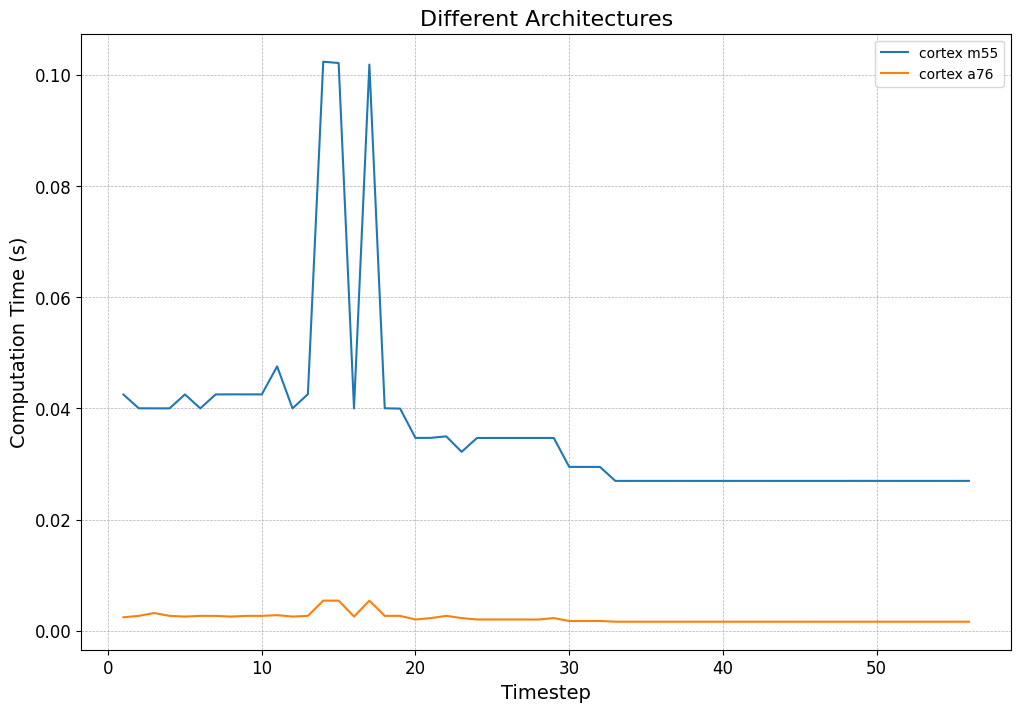

In [30]:
plt.figure(figsize=(12, 8))
data = [loaded_pickles3[0][0], loaded_pickles[5][0]]
parameter_sweep_values = ['cortex m55', 'cortex a76']
# Prepare the data for plotting
i=0
for single_set, label in zip(data, parameter_sweep_values):
    # Create a list of (x, y) pairs, then sort by x before plotting
    pairs = [(x, y) for x, y in single_set.items()]
    pairs_sorted = sorted(pairs, key=lambda pair: pair[0])  # Sort by x-value
    x_values, y_values = zip(*pairs_sorted)  # Unpack sorted pairs into separate lists

    plt.plot(x_values, y_values, label=label)

plt.title("Different Architectures", fontsize=16)
plt.xlabel('Timestep', fontsize=14)
plt.ylabel('Computation Time (s)', fontsize=14)
plt.xticks(fontsize=12)  # Larger x-axis tick labels
plt.yticks(fontsize=12)  # Larger y-axis tick labels
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()